# Breakdown of this notebook:
1. **Loading the dataset:** Load the data (Covid Case & Testing sample) and import the required libraries. <br>


2. **Analysing the Data:** <br>
    - Checking the Datatype.
    - Checking the Null values.
- Mearge Covide case dataset and Testing sample dataset (Inner join).
- Drop unused columns from the merged dataset.
- Extract additional columns from the existing column eg. % Columns.
- Reverse Engineering - From the cumulative data, extracting daily count for Confirmed, Cured, Deaths and testing sample columns


3. **Data Visualization:** Using plots to find relations between the features.
- Bar Chart - Null value chart
- Bar Chart - No of testing sample count taken by state
- Line Chart - Based on the Year and Month (Cured, Death, Confirmed and TotalSample)
- Line Chart - Death % based on the testing sample increment
                **Observation :- When testing sample increasing, % of death is descreasing.
- Line Chart -  Cured % based on the testing sample increment
- Bar Chart - State wise line chart to show the cases (Confirmed, Cured and Deaths)
- Bar Chart - Individual state wise testing sample, Cure and Death counts

In [1]:
#Import required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno

In [2]:
# Load dataset
testing_data = pd.read_csv("StatewiseTestingDetails.csv", parse_dates=['Date'], dayfirst=True)
testing_data

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0
...,...,...,...,...,...
12983,2021-05-02,West Bengal,10545059.0,NaN,NaN
12984,2021-05-03,West Bengal,10600346.0,NaN,NaN
12985,2021-05-04,West Bengal,10658094.0,NaN,NaN
12986,2021-05-05,West Bengal,10717613.0,NaN,NaN


In [3]:
# Data type of dataframe columns
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12988 entries, 0 to 12987
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          12988 non-null  datetime64[ns]
 1   State         12988 non-null  object        
 2   TotalSamples  12988 non-null  float64       
 3   Negative      5986 non-null   object        
 4   Positive      5408 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 507.5+ KB


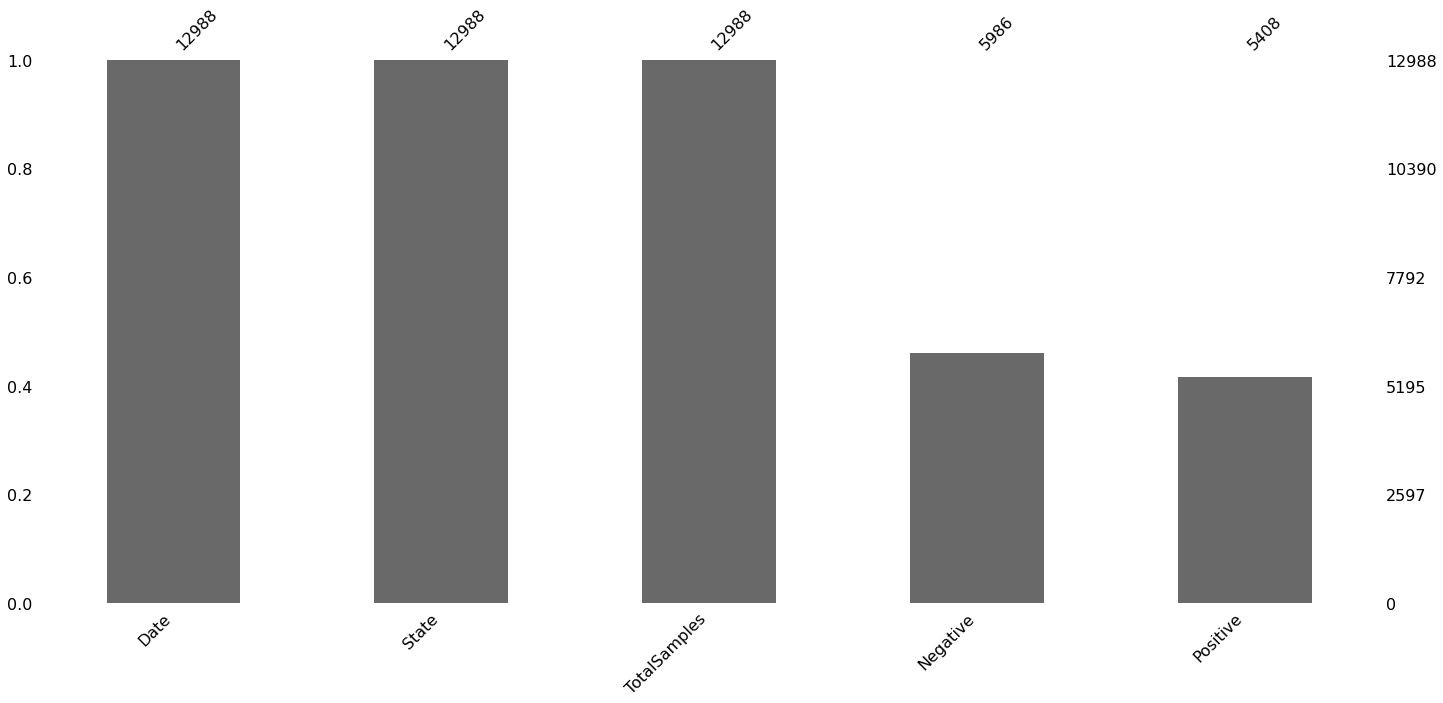

In [4]:
#### Data Visualization - Null value in dataframe
msno.bar(testing_data)

#### Data Imputation

In [5]:
# Load Covid cased data
covid_data = pd.read_csv("covid_19_india.csv",parse_dates=['Date'],dayfirst=True)
covid_data

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
14649,14650,2021-05-07,8:00 AM,Telangana,-,-,405164,2625,481640
14650,14651,2021-05-07,8:00 AM,Tripura,-,-,34153,404,36849
14651,14652,2021-05-07,8:00 AM,Uttarakhand,-,-,154147,3293,220351
14652,14653,2021-05-07,8:00 AM,Uttar Pradesh,-,-,1151571,14501,1425916


#### Imputation - Merge covid data and Testing cases data

In [6]:
# Merge 2 dataframe with inner join and create new dataframe.
new_covid_data = pd.merge(covid_data,testing_data, how='inner', left_on=['Date','State/UnionTerritory'], right_on=['Date','State'])
new_covid_data

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,State,TotalSamples,Negative,Positive
0,536,2020-04-01,7:30 PM,Delhi,-,-,6,2,152,Delhi,2621.0,NaN,NaN
1,544,2020-04-01,7:30 PM,Kerala,-,-,23,2,241,Kerala,7965.0,7256,265.0
2,558,2020-04-01,7:30 PM,West Bengal,-,-,6,3,37,West Bengal,659.0,568,37.0
3,559,2020-04-02,6:00 PM,Andhra Pradesh,-,-,1,1,86,Andhra Pradesh,1800.0,1175,132.0
4,561,2020-04-02,6:00 PM,Assam,-,-,0,0,5,Assam,962.0,819,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12592,14614,2021-05-06,8:00 AM,Telangana,-,-,396042,2579,475748,Telangana,13347076.0,NaN,NaN
12593,14615,2021-05-06,8:00 AM,Tripura,-,-,34004,403,36534,Tripura,732887.0,696356,36531.0
12594,14616,2021-05-06,8:00 AM,Uttarakhand,-,-,149166,3142,211834,Uttarakhand,3954321.0,3733970,NaN
12595,14617,2021-05-06,8:00 AM,Uttar Pradesh,-,-,1122669,14151,1399294,Uttar Pradesh,42258373.0,NaN,NaN


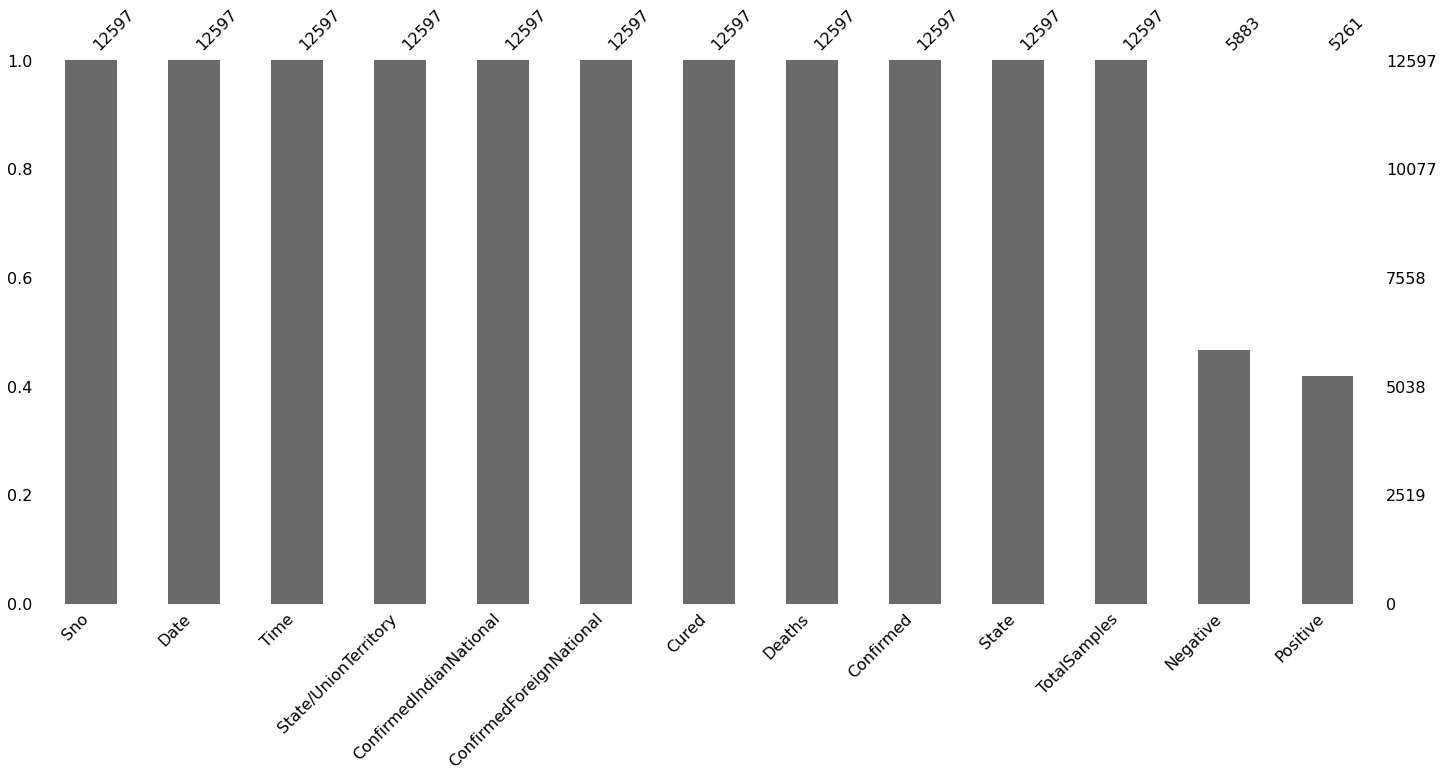

In [7]:
msno.bar(new_covid_data)

In [8]:
# Drop Unused columns (ConfirmedIndianNational, ConfirmedForeignNational, Negative, Positive) from new dataframe
new_covid_data.drop(['ConfirmedIndianNational', 'ConfirmedForeignNational', 'Negative', 'Positive','State/UnionTerritory'], axis='columns', inplace=True)
new_covid_data

,Sno,Date,Time,Cured,Deaths,Confirmed,State,TotalSamples
0,536,2020-04-01,7:30 PM,6,2,152,Delhi,2621.0
1,544,2020-04-01,7:30 PM,23,2,241,Kerala,7965.0
2,558,2020-04-01,7:30 PM,6,3,37,West Bengal,659.0
3,559,2020-04-02,6:00 PM,1,1,86,Andhra Pradesh,1800.0
4,561,2020-04-02,6:00 PM,0,0,5,Assam,962.0
...,...,...,...,...,...,...,...,...
12592,14614,2021-05-06,8:00 AM,396042,2579,475748,Telangana,13347076.0
12593,14615,2021-05-06,8:00 AM,34004,403,36534,Tripura,732887.0
12594,14616,2021-05-06,8:00 AM,149166,3142,211834,Uttarakhand,3954321.0
12595,14617,2021-05-06,8:00 AM,1122669,14151,1399294,Uttar Pradesh,42258373.0


#### Extract additional columns from the existing column eg. % Columns

In [9]:
# Data preparation - Extract additional columns from the dataframe
new_covid_data['Year'] = new_covid_data['Date'].dt.year
new_covid_data['Month'] = new_covid_data['Date'].dt.month

new_covid_data['Cured%'] = round((new_covid_data['Cured'] * 100) / new_covid_data['Confirmed'],2) # Cured % based on the Confirmed case
new_covid_data['Deaths%'] = round((new_covid_data['Deaths'] * 100) / new_covid_data['Confirmed'],2) # Deaths % based on the Confirmed case
new_covid_data['Confirmed%'] = round((new_covid_data['Confirmed'] * 100) / new_covid_data['TotalSamples'],2) # Confirmed % based on the Total Samples taken
new_covid_data['Year-Month'] = new_covid_data[['Year','Month']].astype(str).apply(lambda x: '-'.join(x),axis=1)
new_covid_data

,Sno,Date,Time,Cured,Deaths,Confirmed,State,TotalSamples,Year,Month,Cured%,Deaths%,Confirmed%,Year-Month
0,536,2020-04-01,7:30 PM,6,2,152,Delhi,2621.0,2020,4,3.95,1.32,5.80,2020-4
1,544,2020-04-01,7:30 PM,23,2,241,Kerala,7965.0,2020,4,9.54,0.83,3.03,2020-4
2,558,2020-04-01,7:30 PM,6,3,37,West Bengal,659.0,2020,4,16.22,8.11,5.61,2020-4
3,559,2020-04-02,6:00 PM,1,1,86,Andhra Pradesh,1800.0,2020,4,1.16,1.16,4.78,2020-4
4,561,2020-04-02,6:00 PM,0,0,5,Assam,962.0,2020,4,0.00,0.00,0.52,2020-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12592,14614,2021-05-06,8:00 AM,396042,2579,475748,Telangana,13347076.0,2021,5,83.25,0.54,3.56,2021-5
12593,14615,2021-05-06,8:00 AM,34004,403,36534,Tripura,732887.0,2021,5,93.07,1.10,4.98,2021-5
12594,14616,2021-05-06,8:00 AM,149166,3142,211834,Uttarakhand,3954321.0,2021,5,70.42,1.48,5.36,2021-5
12595,14617,2021-05-06,8:00 AM,1122669,14151,1399294,Uttar Pradesh,42258373.0,2021,5,80.23,1.01,3.31,2021-5


#### From the cumulative data, extracting daily count for Confirmed, Cured, Deaths & TestSamples

In [10]:
def daily_counts(State):
    data = new_covid_data[(new_covid_data['State']==State)].sort_values(['Date','State','Confirmed','Cured','Deaths','TotalSamples'],ascending=False)

    lst_data_index = data.index.tolist()
    data_len = len(lst_data_index)



    for ind,val in enumerate(lst_data_index):
        if data_len-1 == ind:
            new_covid_data['daily_cured_count'].iloc[val] = new_covid_data.iloc[lst_data_index[ind]]['Cured']
            new_covid_data['daily_death_count'].iloc[val] = new_covid_data.iloc[lst_data_index[ind]]['Deaths']
            new_covid_data['daily_confirmed_count'].iloc[val] = new_covid_data.iloc[lst_data_index[ind]]['Confirmed']
            new_covid_data['daily_sample_count'].iloc[val] = new_covid_data.iloc[lst_data_index[ind]]['TotalSamples']
            
        else:    
            new_covid_data['daily_cured_count'].iloc[val] = new_covid_data.iloc[lst_data_index[ind]]['Cured'] - new_covid_data.iloc[lst_data_index[ind+1]]['Cured']
            new_covid_data['daily_death_count'].iloc[val] = new_covid_data.iloc[lst_data_index[ind]]['Deaths'] - new_covid_data.iloc[lst_data_index[ind+1]]['Deaths']
            new_covid_data['daily_confirmed_count'].iloc[val] = new_covid_data.iloc[lst_data_index[ind]]['Confirmed'] - new_covid_data.iloc[lst_data_index[ind+1]]['Confirmed']
            new_covid_data['daily_sample_count'].iloc[val] = new_covid_data.iloc[lst_data_index[ind]]['TotalSamples'] - new_covid_data.iloc[lst_data_index[ind+1]]['TotalSamples']
    #print ('State Done --- ',State)

In [11]:
new_covid_data['daily_cured_count'] = np.nan
new_covid_data['daily_death_count'] = np.nan
new_covid_data['daily_confirmed_count'] = np.nan
new_covid_data['daily_sample_count'] = np.nan

for State in new_covid_data['State'].unique().tolist():
    daily_counts(State)
    
new_covid_data

C:\Users\DineshNaik\anaconda3\envs\envbik\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Sno,Date,Time,Cured,Deaths,Confirmed,State,TotalSamples,Year,Month,Cured%,Deaths%,Confirmed%,Year-Month,daily_cured_count,daily_death_count,daily_confirmed_count,daily_sample_count
0,536,2020-04-01,7:30 PM,6,2,152,Delhi,2621.0,2020,4,3.95,1.32,5.80,2020-4,6.0,2.0,152.0,2621.0
1,544,2020-04-01,7:30 PM,23,2,241,Kerala,7965.0,2020,4,9.54,0.83,3.03,2020-4,23.0,2.0,241.0,7965.0
2,558,2020-04-01,7:30 PM,6,3,37,West Bengal,659.0,2020,4,16.22,8.11,5.61,2020-4,6.0,3.0,37.0,659.0
3,559,2020-04-02,6:00 PM,1,1,86,Andhra Pradesh,1800.0,2020,4,1.16,1.16,4.78,2020-4,1.0,1.0,86.0,1800.0
4,561,2020-04-02,6:00 PM,0,0,5,Assam,962.0,2020,4,0.00,0.00,0.52,2020-4,0.0,0.0,5.0,962.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12592,14614,2021-05-06,8:00 AM,396042,2579,475748,Telangana,13347076.0,2021,5,83.25,0.54,3.56,2021-5,6551.0,52.0,6026.0,79824.0
12593,14615,2021-05-06,8:00 AM,34004,403,36534,Tripura,732887.0,2021,5,93.07,1.10,4.98,2021-5,75.0,3.0,300.0,5352.0
12594,14616,2021-05-06,8:00 AM,149166,3142,211834,Uttarakhand,3954321.0,2021,5,70.42,1.48,5.36,2021-5,4757.0,127.0,7783.0,35735.0
12595,14617,2021-05-06,8:00 AM,1122669,14151,1399294,Uttar Pradesh,42258373.0,2021,5,80.23,1.01,3.31,2021-5,40852.0,353.0,31111.0,226112.0


#### Data Visualization - No of testing sample count taken by state

C:\Users\DineshNaik\anaconda3\envs\envbik\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


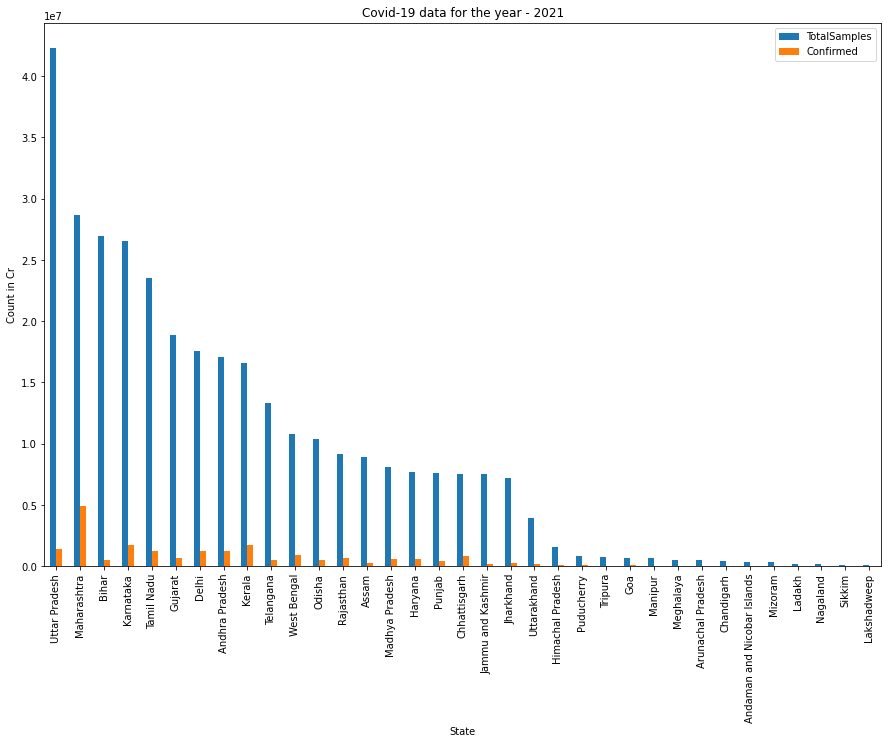

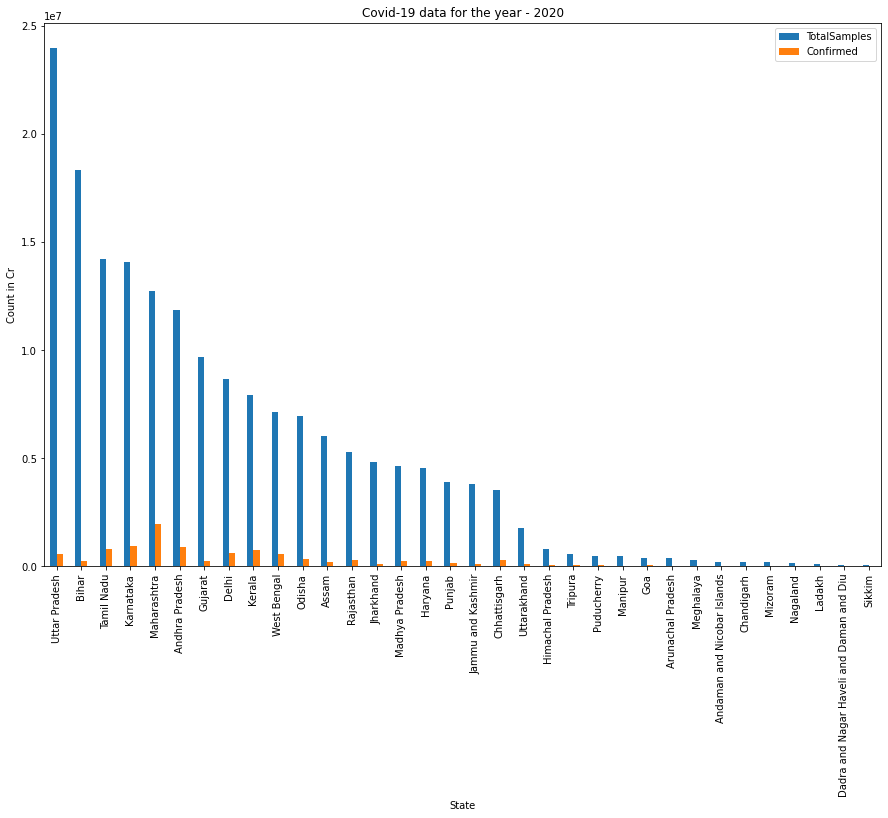

In [12]:
grp_covid_data = new_covid_data.groupby(['Year','State'])['Cured','Deaths','Confirmed','TotalSamples'].max().reset_index()
grp_covid_data.sort_values(['TotalSamples','Confirmed','Cured','Deaths'],ascending=False,inplace=True) 
for yr in grp_covid_data['Year'].unique().tolist():
    yr_covid_data = grp_covid_data[grp_covid_data['Year']==yr]
    yr_covid_data.plot(x='State',y=['TotalSamples','Confirmed'],kind="bar", figsize=(15,10))
    plt.title("Covid-19 data for the year - {}".format(yr))
    plt.ylabel("Count in Cr")

#### Data Visualization - Based on the Year and Month

C:\Users\DineshNaik\anaconda3\envs\envbik\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


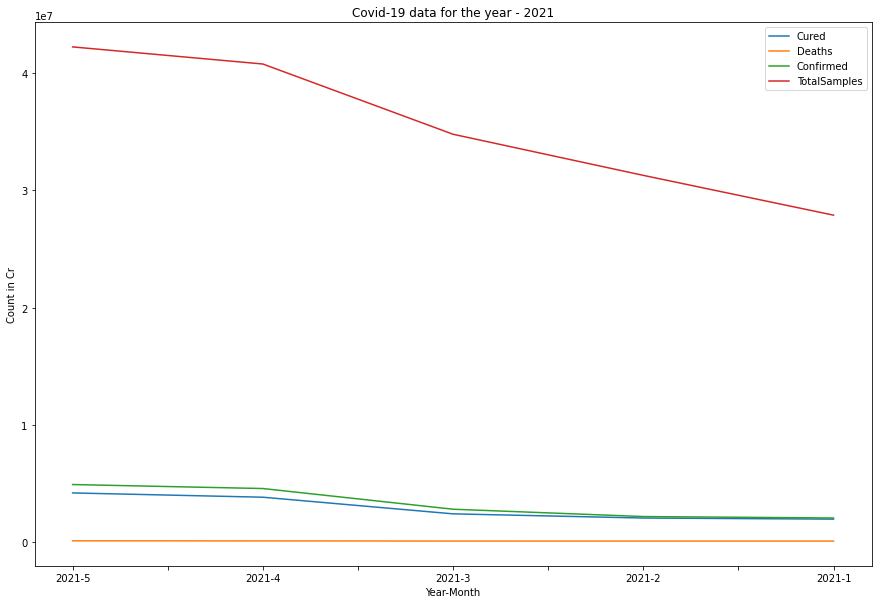

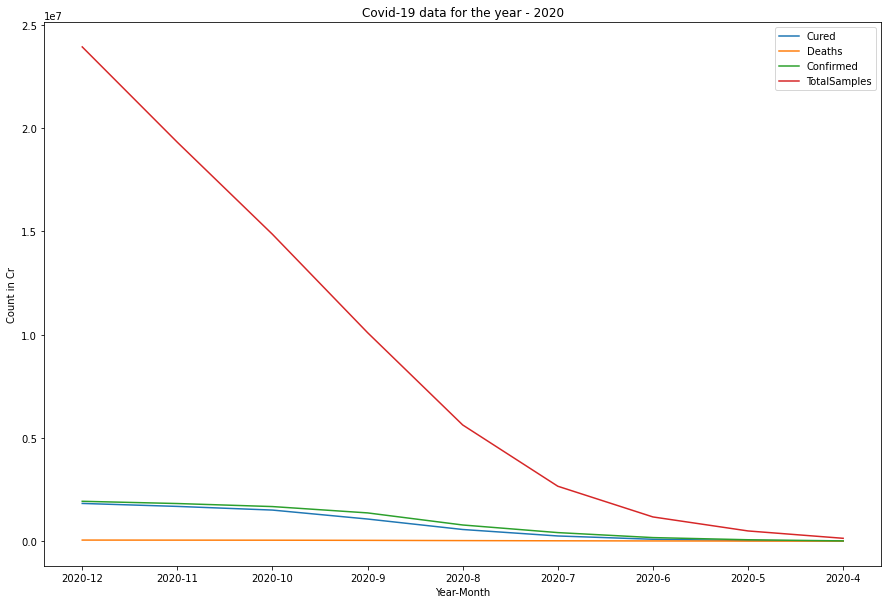

In [13]:
grp_covid_data = new_covid_data.groupby(['Year','Month'])['Cured','Deaths','Confirmed','TotalSamples','Year-Month','Deaths%','Confirmed%','Cured%'].max().reset_index()
grp_covid_data.sort_values(['TotalSamples','Confirmed','Cured','Deaths','Deaths%','Confirmed%','Cured%'],ascending=False,inplace=True) 
for yr in grp_covid_data['Year'].unique().tolist():
    yr_covid_data = grp_covid_data[grp_covid_data['Year']==yr]
    yr_covid_data.plot(x='Year-Month',y=['Cured','Deaths','Confirmed','TotalSamples'],kind="line", figsize=(15,10))
    plt.title("Covid-19 data for the year - {}".format(yr))
    plt.ylabel("Count in Cr")

#### Data Visualization - Death % based on the testing sample increment

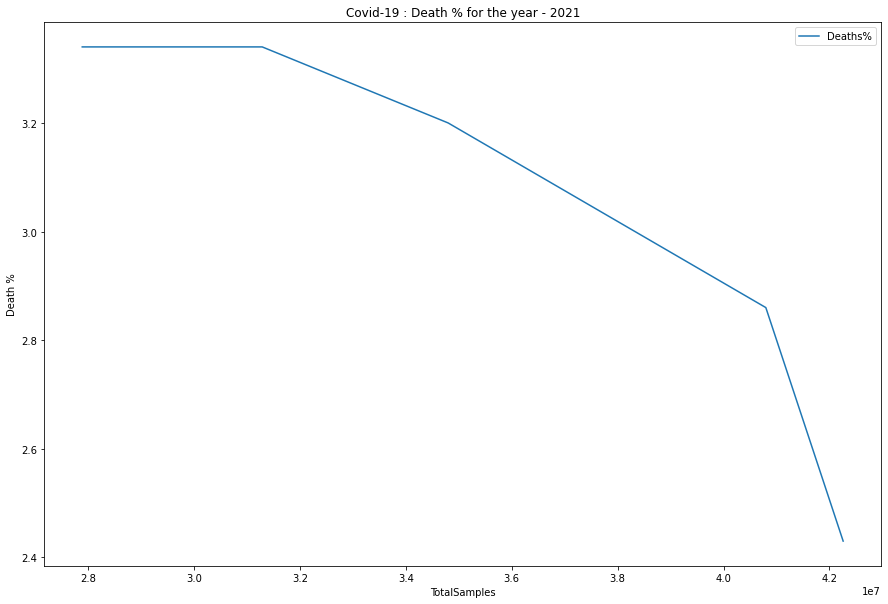

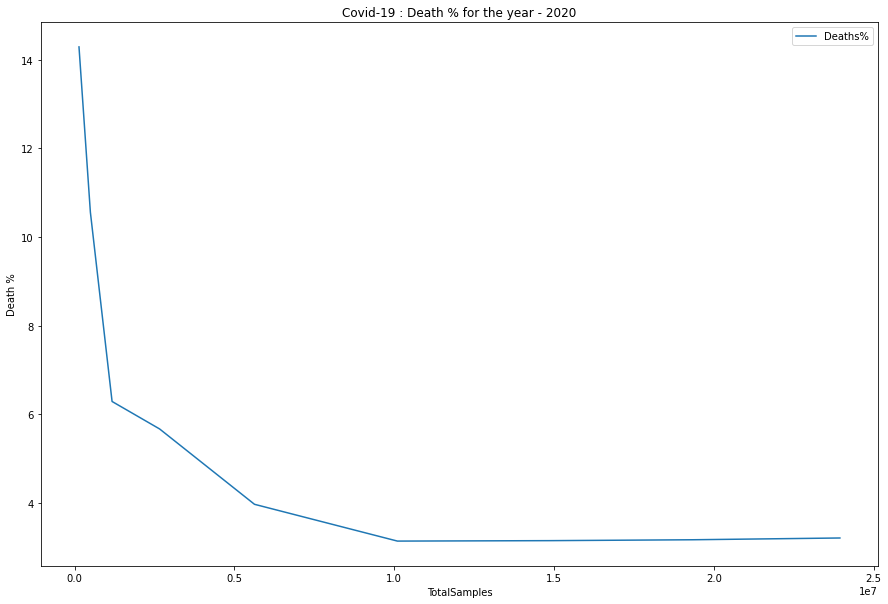

In [14]:
for yr in grp_covid_data['Year'].unique().tolist():
    yr_covid_data = grp_covid_data[grp_covid_data['Year']==yr]
    yr_covid_data.plot(x='TotalSamples',y=['Deaths%'],kind="line", figsize=(15,10))
    plt.title("Covid-19 : Death % for the year - {}".format(yr))
    plt.ylabel("Death %")

#### Data Visualization - Cured % based on the testing sample increment

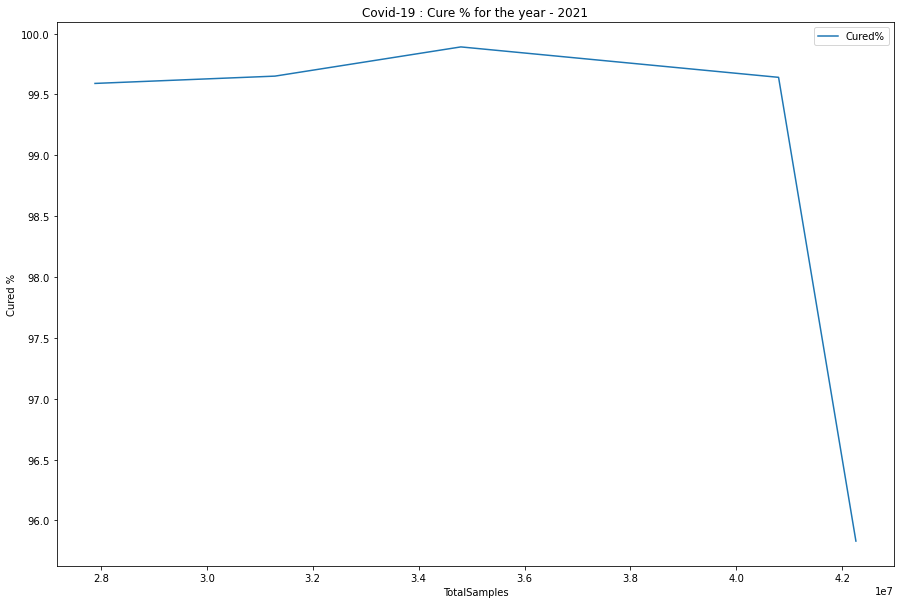

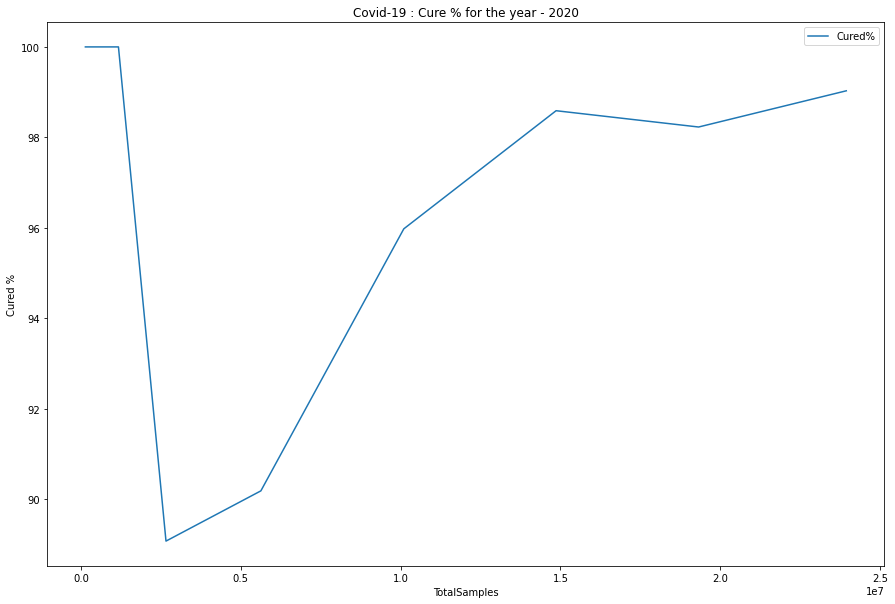

In [15]:
for yr in grp_covid_data['Year'].unique().tolist():
    yr_covid_data = grp_covid_data[grp_covid_data['Year']==yr]
    yr_covid_data.plot(x='TotalSamples',y=['Cured%'],kind="line", figsize=(15,10))
    plt.title("Covid-19 : Cure % for the year - {}".format(yr))
    plt.ylabel("Cured %")

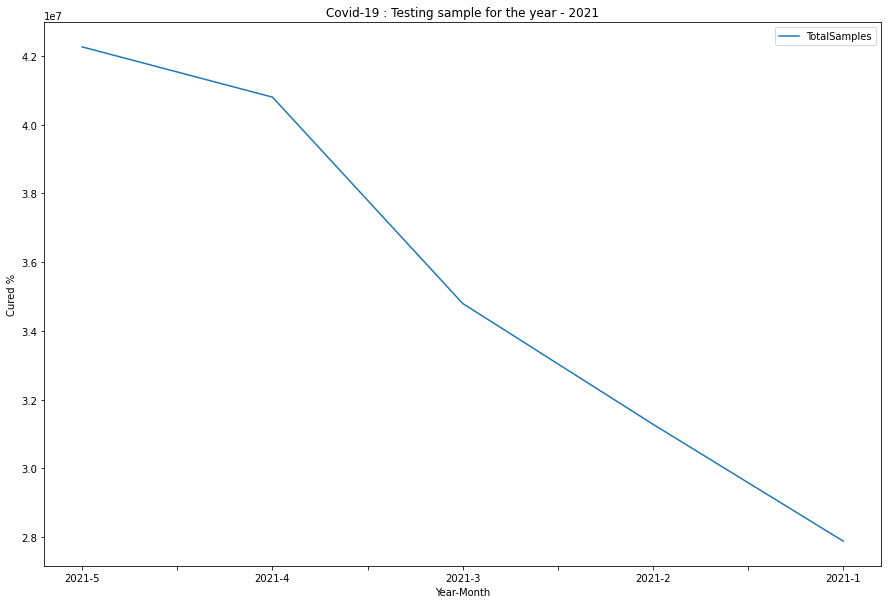

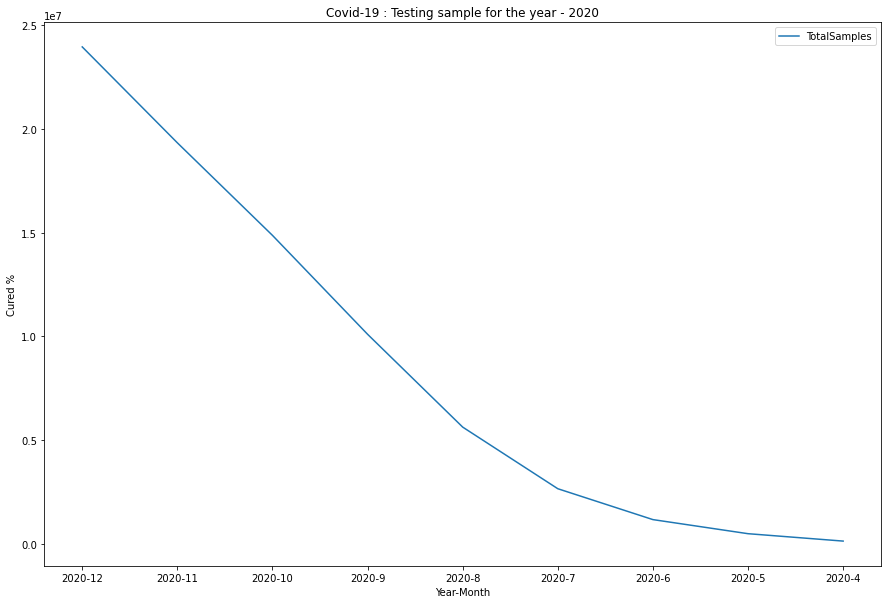

In [16]:
for yr in grp_covid_data['Year'].unique().tolist():
    yr_covid_data = grp_covid_data[grp_covid_data['Year']==yr]
    yr_covid_data.plot(x='Year-Month',y=['TotalSamples'],kind="line", figsize=(15,10))
    plt.title("Covid-19 : Testing sample for the year - {}".format(yr))
    plt.ylabel("Cured %")

#### Data Visualization - Year and Month wise state data (Cured, Confirmed, Deaths and Testing Samples)

In [17]:
 def top_in_state(x,yr_mnth):
    grp_covid_data = new_covid_data.groupby(['Year-Month','State'])['Cured','Deaths','Confirmed','TotalSamples','Year-Month','Deaths%','Confirmed%','Cured%','daily_cured_count','daily_death_count','daily_confirmed_count','daily_sample_count'].median().reset_index()
    grp_covid_data.sort_values(['TotalSamples','Confirmed','Cured','Deaths','Deaths%','Confirmed%','Cured%','daily_cured_count','daily_death_count','daily_confirmed_count','daily_sample_count'],ascending=False,inplace=True)
    #top_20_state = grp_covid_data[grp_covid_data['Year-Month']=='2021-5'].nlargest(20,'TotalSamples')['State'].unique().tolist()
    top_20_state = ['daily_cured_count','daily_death_count','daily_confirmed_count','daily_sample_count']
    
    nrow = 2
    ncol = 2
    count = 0
    fig , ax = plt.subplots(nrow,ncol,figsize=(20,10))
    for nr in range(nrow):
        for nc in range(ncol):
            #print(top_20_state[count])
            data = grp_covid_data[grp_covid_data['Year-Month']==yr_mnth].sort_values(top_20_state[count],ascending=False)
            data.plot(x=x, y=top_20_state[count],kind='bar',ax=ax[nr,nc],title="{} for {}".format(top_20_state[count],yr_mnth))
            count =count+1

        # set the spacing between subplots
        plt.subplots_adjust(left=0.1,
                            bottom=0.1, 
                            right=0.8, 
                            top=0.9, 
                            wspace=0.1, 
                            hspace=.8) 

C:\Users\DineshNaik\anaconda3\envs\envbik\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


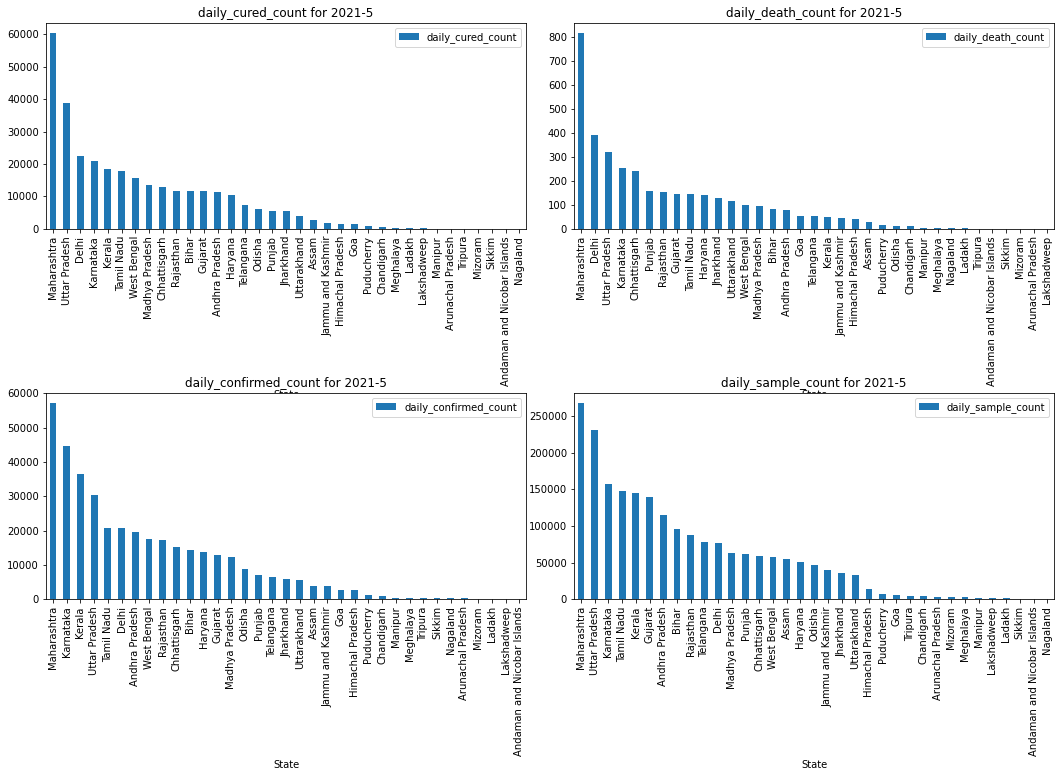

In [18]:
top_in_state('State','2021-5')

In [19]:
def state_wise_data(x,y):
    grp_covid_data = new_covid_data.groupby(['Year-Month','State'])['Cured','Deaths','Confirmed','TotalSamples','Year-Month','Deaths%','Confirmed%','Cured%','daily_cured_count','daily_death_count','daily_confirmed_count','daily_sample_count'].median().reset_index()
    grp_covid_data.sort_values(['TotalSamples','Confirmed','Cured','Deaths','Deaths%','Confirmed%','Cured%','daily_cured_count','daily_death_count','daily_confirmed_count','daily_sample_count'],ascending=False,inplace=True)
    top_20_state = grp_covid_data[grp_covid_data['Year-Month']=='2021-5'].nlargest(20,'TotalSamples')['State'].unique().tolist()

    nrow = 10
    ncol = 2
    count = 0
    fig , ax = plt.subplots(nrow,ncol,figsize=(20,35))
    for nr in range(nrow):
        for nc in range(ncol):
            #print(top_20_state[count])
            data = grp_covid_data[grp_covid_data['State']==top_20_state[count]]
            data.plot(x=x, y=y,kind='bar',ax=ax[nr,nc],title=top_20_state[count])
            count =count+1

        # set the spacing between subplots
        plt.subplots_adjust(left=0.1,
                            bottom=0.1, 
                            right=0.8, 
                            top=0.9, 
                            wspace=0.1, 
                            hspace=.8)        

#### Data Visualization - Individual state wise testing sample counts

C:\Users\DineshNaik\anaconda3\envs\envbik\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


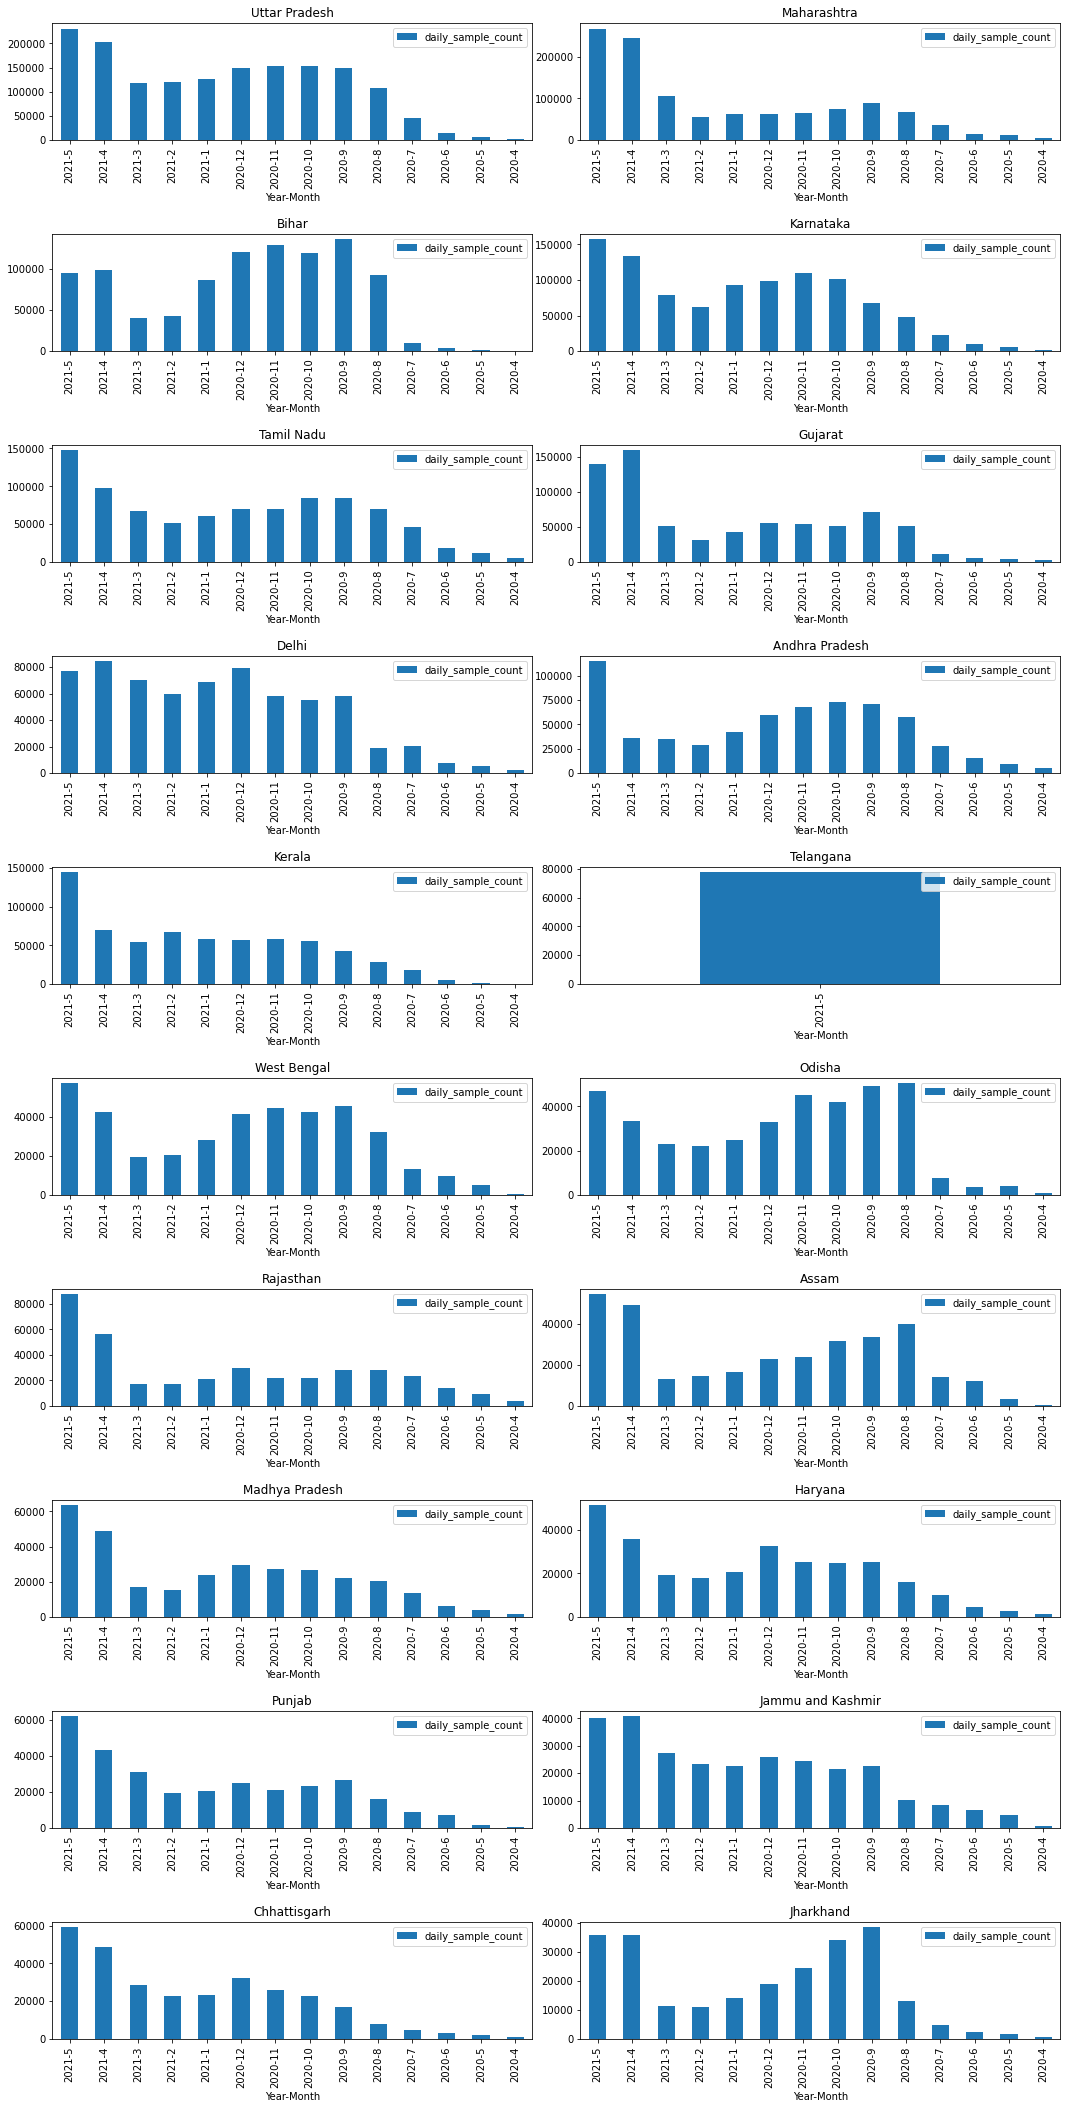

In [20]:
state_wise_data('Year-Month','daily_sample_count')

#### Data Visualization - Individual state wise Cure counts

C:\Users\DineshNaik\anaconda3\envs\envbik\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


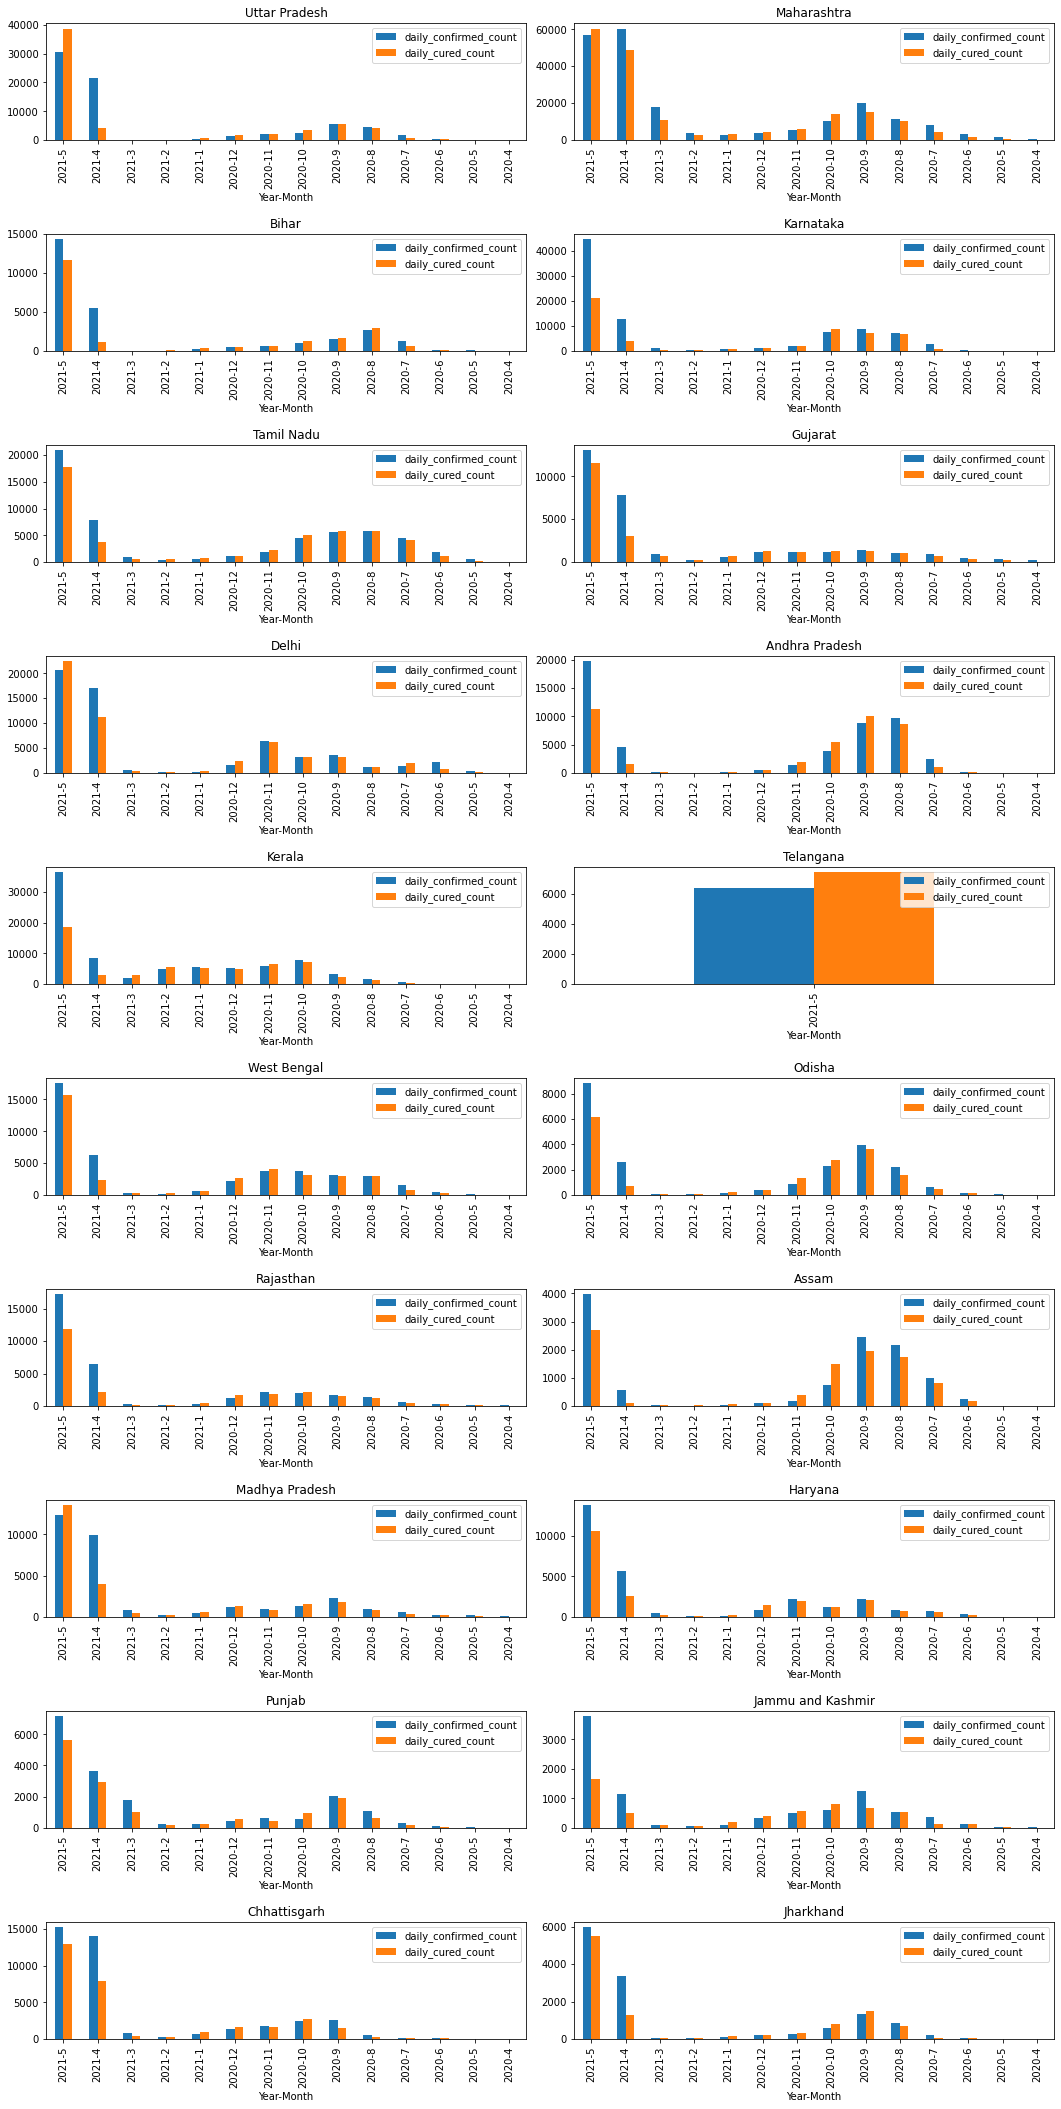

In [21]:
y = ['daily_confirmed_count','daily_cured_count']
state_wise_data('Year-Month',y)

#### Data Visualization - Individual state wise Death counts

C:\Users\DineshNaik\anaconda3\envs\envbik\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


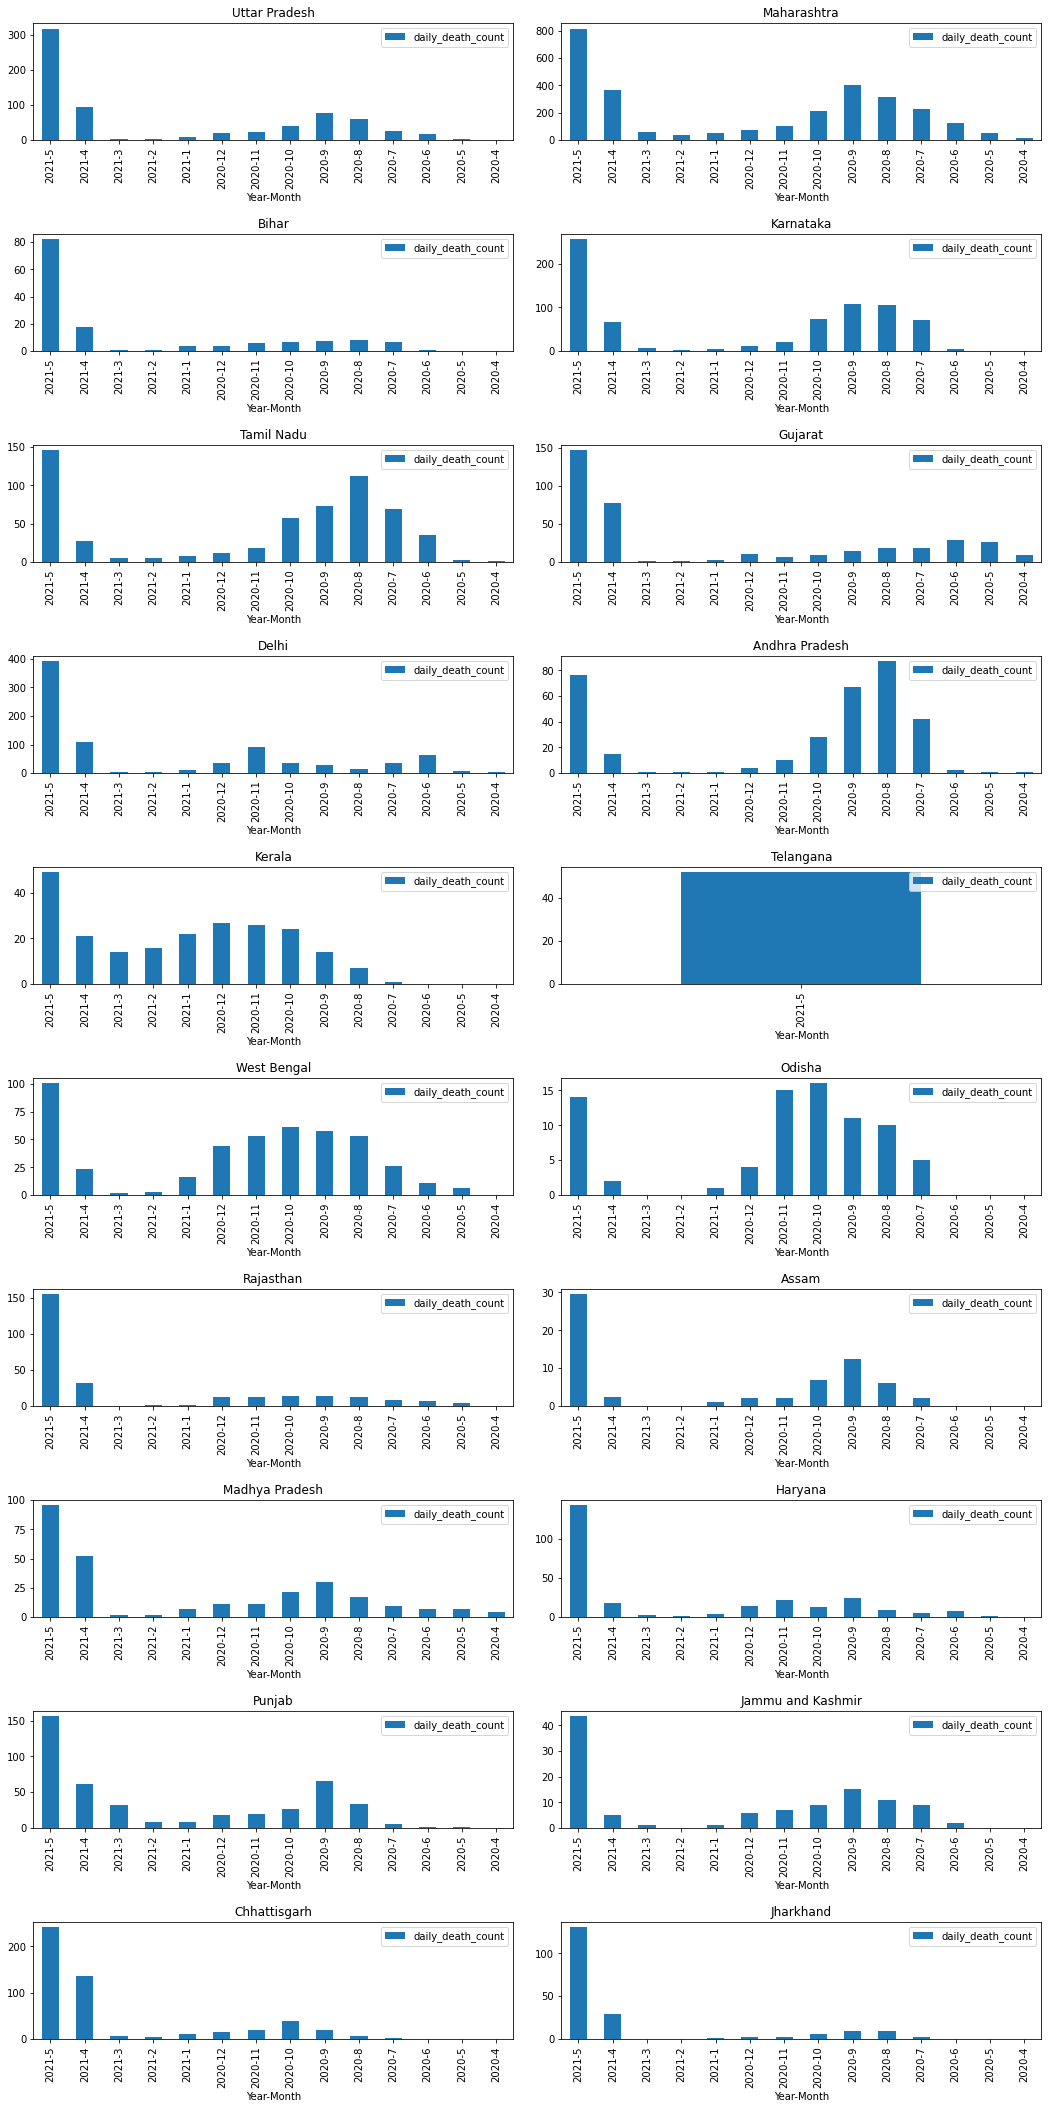

In [22]:
y = ['daily_death_count']
state_wise_data('Year-Month',y)